<a href="https://colab.research.google.com/github/ApssaraGanesh/AIML_CODEBASE/blob/main/GPT2_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import zipfile

# #Replace 'your_uploaded_file.zip' with the actual filename
# zip_file_name = '/content/drive/MyDrive/qa dataset/aiml-qa-dataset.zip'
# with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Capstone/qa dataset')

In [ ]:
!pip install evaluate sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 8.9 MB/s eta 0:00:00


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=566f7d58658147444e02887fe5a4d7befac3927a54dd0c304e6b13a7af6bd296
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!pip install transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.2 MB/s eta 0:00:00


In [ ]:
import os
import math
import random
import torch
import evaluate
import numpy as np
import pandas as pd
import  seaborn as sns
from matplotlib import pyplot as plt


from transformers import LineByLineTextDataset
from transformers import DataCollatorForLanguageModeling
from transformers import GPT2Tokenizer,GPT2LMHeadModel
from transformers import Trainer,TrainingArguments

In [ ]:
pip install pandas


In [ ]:
pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=2e9a5530401110e4f41b9f2e317c89101ea6b4715b83405d5611b29da4dfe4ee
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
import wandb
wandb.login(key = '6f46421a96ff5c8b5528e26db701d68c51dbf6c2')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# import wandb

wandb.init(project = "Question_Answer")

wandb: Currently logged in as: jadhavrushikesh580. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.10
wandb: Run data is saved locally in /content/wandb/run-20230916_081646-xzakeim2
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run deft-paper-2
wandb: ⭐️ View project at https://wandb.ai/jadhavrushikesh580/Question_Answer
wandb: 🚀 View run at https://wandb.ai/jadhavrushikesh580/Question_Answer/runs/xzakeim2


In [ ]:
DOWN_DATA_PATH = '/content/drive/MyDrive/Capstone/aiml-qa-dataset'
LINES_DATA_PATH = 'q&a_dataset'
MODEL_KEY = 'distilgpt2'
EXP_NAME = f'qa-subgen-{MODEL_KEY}'


SEED_VALUE = 15
LEARNING_RATE = 1e-4
TRAIN_BATCH_SIZE = 2
EVAL_BATCH_SIZE = 2 * TRAIN_BATCH_SIZE
N_EPOCHS = 1

In [ ]:
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
torch.manual_seed(SEED_VALUE)

In [ ]:
os.makedirs(LINES_DATA_PATH, exist_ok=True)

def prepare_train_dataset(down_data_path, lines_data_path, split):
    # Read data from the XLSX file into a pandas DataFrame
    data = pd.read_excel('/content/drive/MyDrive/Capstone/qa dataset/aiml-qa-train.xlsx')

    # Create the output file path with the split name and .txt extension
    output_file = os.path.join(lines_data_path, f'{split}.txt')

    # Open the output text file in write mode
    with open(output_file, 'w') as f:
        # Iterate through each row in the DataFrame
        for index, row in data.iterrows():
            question = row['question']
            answer = row['answer']

            # Write the question and answer in the desired format to the text file
            f.write(f"<question> {question}<answer> {answer}\n")

# Replace 'DOWN_DATA_PATH' with the path to your input XLSX file
#DOWN_DATA_PATH = "path/to/your/input_file.xlsx"

# Replace 'LINES_DATA_PATH' with the path to your lines data directory
#LINES_DATA_PATH = "path/to/your/lines_data_directory"

# Replace 'qatrain' with the desired split name
prepare_train_dataset(DOWN_DATA_PATH, LINES_DATA_PATH, 'qatrain')


In [ ]:
os.makedirs(LINES_DATA_PATH, exist_ok=True)

def prepare_dev_dataset(down_data_path, lines_data_path, split):
    # Read data from the XLSX file into a pandas DataFrame
    data = pd.read_excel('/content/drive/MyDrive/Capstone/qa dataset/aiml-qa-dev.xlsx')

    # Create the output file path with the split name and .txt extension
    output_file = os.path.join(lines_data_path, f'{split}.txt')

    # Open the output text file in write mode
    with open(output_file, 'w') as f:
        # Iterate through each row in the DataFrame
        for index, row in data.iterrows():
            question = row['question']
            answer1 = row['answer1']
            answer2 = row['answer2']

            # Write the question and answer in the desired format to the text file
            f.write(f"<question> {question}<answer1> {answer1} <answer2> {answer2}\n")

# Replace 'DOWN_DATA_PATH' with the path to your input XLSX file
#DOWN_DATA_PATH = "path/to/your/input_file.xlsx"

# Replace 'LINES_DATA_PATH' with the path to your lines data directory
#LINES_DATA_PATH = "path/to/your/lines_data_directory"

# Replace 'qatrain' with the desired split name
prepare_dev_dataset(DOWN_DATA_PATH, LINES_DATA_PATH, 'qadev')

In [ ]:
os.makedirs(LINES_DATA_PATH, exist_ok=True)

def prepare_test_dataset(down_data_path, lines_data_path, split):
    # Read data from the XLSX file into a pandas DataFrame
    data = pd.read_excel('/content/drive/MyDrive/Capstone/qa dataset/aiml-qa-test.xlsx')

    # Create the output file path with the split name and .txt extension
    output_file = os.path.join(lines_data_path, f'{split}.txt')

    # Open the output text file in write mode
    with open(output_file, 'w') as f:
        # Iterate through each row in the DataFrame
        for index, row in data.iterrows():
            question = row['question']
            answer1 = row['answer1']
            answer2 = row['answer2']

            # Write the question and answer in the desired format to the text file
            f.write(f"<question> {question}<answer1> {answer1} <answer2> {answer2}\n")

# Replace 'DOWN_DATA_PATH' with the path to your input XLSX file
#DOWN_DATA_PATH = "path/to/your/input_file.xlsx"

# Replace 'LINES_DATA_PATH' with the path to your lines data directory
#LINES_DATA_PATH = "path/to/your/lines_data_directory"

# Replace 'qatrain' with the desired split name
prepare_test_dataset(DOWN_DATA_PATH, LINES_DATA_PATH, 'qatest')

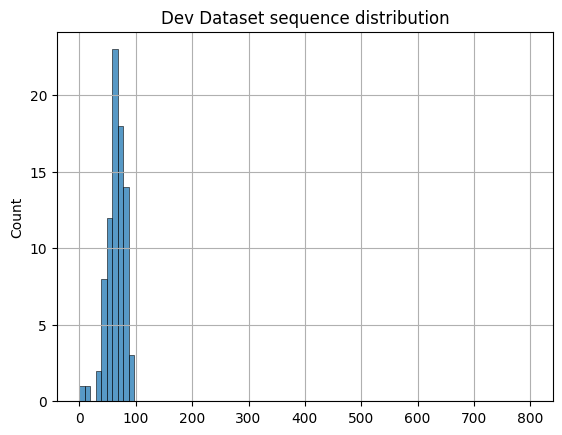

In [ ]:
with open(os.path.join(LINES_DATA_PATH,'qadev.txt'),'r') as f:
    dev_lines = f.readlines()
dev_seq_lens = np.array([len(line.split()) for line in dev_lines])
sns.histplot(dev_seq_lens,binrange=(0,800))
plt.grid()
plt.title('Dev Dataset sequence distribution')
plt.show()

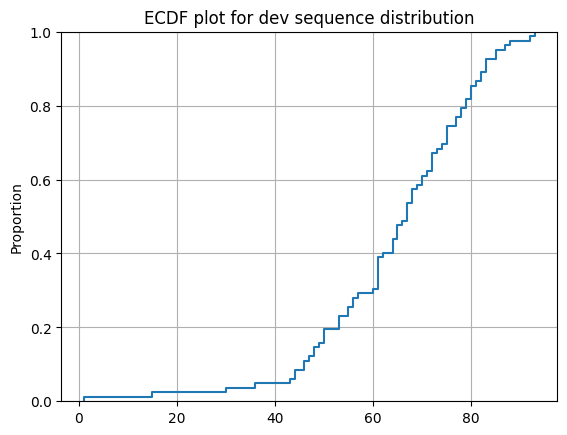

In [ ]:
sns.ecdfplot(np.clip(dev_seq_lens,a_min=0,a_max=800))
plt.grid()
plt.title('ECDF plot for dev sequence distribution')
plt.show()

In [ ]:
dev_seq_lens.mean(),dev_seq_lens.std(),np.median(dev_seq_lens),dev_seq_lens.min(),dev_seq_lens.max()

(64.70731707317073, 16.11504962788575, 67.0, 1, 93)

In [ ]:
def load_dataset(file_path,tokenizer):
    block_size = 256 if 'train' in file_path else 512

    dataset = LineByLineTextDataset(
             tokenizer=tokenizer,
             file_path=file_path,
             block_size=block_size
    )
    return dataset

In [ ]:
def load_data_collator(tokenizer,mlm=False):
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=mlm
    )
    return data_collator

In [ ]:
tokenizer= GPT2Tokenizer.from_pretrained(MODEL_KEY)
tokenizer.add_special_tokens({'pad_token':'{PAD}'})

model = GPT2LMHeadModel.from_pretrained(MODEL_KEY)
model.resize_token_embeddings(len(tokenizer))

type(tokenizer),type(model)

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 50258. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


(transformers.models.gpt2.tokenization_gpt2.GPT2Tokenizer,
 transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel)

In [ ]:
n_model_params = 0
for p in model.parameters():
    n_model_params += p.numel()

print(f' *parameters in LM Head Model {MODEL_KEY}:{n_model_params}')

 *parameters in LM Head Model distilgpt2:81913344


In [ ]:
train_dataset=load_dataset(os.path.join(LINES_DATA_PATH,'qatrain.txt'),tokenizer)
dev_dataset=load_dataset(os.path.join(LINES_DATA_PATH,'qadev.txt'),tokenizer)
test_dataset=load_dataset(os.path.join(LINES_DATA_PATH,'qatest.txt'),tokenizer)


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:119: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
data_collator=load_data_collator(tokenizer)

In [ ]:

len(train_dataset),len(dev_dataset),len(test_dataset)

(1771, 82, 171)

In [ ]:
pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 700.7 kB/s eta 0:00:00


In [ ]:
from evaluate import load

In [ ]:
bleu = evaluate.load('bleu')
rouge = evaluate.load('rouge')
bertscore = load('bertscore')
#meteor = evaluate.load('meteor')


def preprocess_logits_for_metrics(logits, labels):
    pred_ids = torch.argmax(logits, dim=-1)

    return pred_ids, labels


def compute_metrics(eval_preds):
    logits, labels = eval_preds
    preds = logits[0]
    preds = np.where(preds!= -100,preds, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    sequences = tokenizer.batch_decode(labels, skip_special_tokens=True)

    prompts = list()
    references = list()
    for sequence in sequences:
        try:
            prompt, ref_text = sequence.split('<answer1>')
            prompt += '<answer1>'
            answer1, answer1_right = ref_text.split('<answer2>')
            #answer2, answer2_right = answer1_right.split('<ann1>')
            prompts.append(prompt)
            references.append([answer1, answer1_right])
        except ValueError:
            continue

    tokenizer.padding_side='left'
    n_batches = math.ceil(len(prompts)*1.0 / EVAL_BATCH_SIZE)
    outputs = list()
    for i in range(n_batches):
        prompts_batch = prompts[i*EVAL_BATCH_SIZE : (i+1)*EVAL_BATCH_SIZE]
        prompts_batch_ids = tokenizer(prompts_batch,
            padding=True, truncation=True, return_tensors='pt').to(model.device)
        output_ids = model.generate(
            **prompts_batch_ids, max_new_tokens=10,
            pad_token_id=tokenizer.pad_token_id)
        outputs_batch = [seq.split('<answer1>')[1] for seq in
            tokenizer.batch_decode(output_ids, skip_special_tokens=True)]
        outputs.extend(outputs_batch)
    tokenizer.padding_side='right'

    bleu_score = bleu.compute(predictions=outputs, references=references)
    rouge_score = rouge.compute(predictions=outputs, references=references)
    results = bertscore.compute(predictions=outputs, references=references,lang='en')
    avg_precision = sum(results['precision']) / len(results['precision'])
    avg_recall = sum(results['recall']) / len(results['recall'])
    avg_f1 = sum(results['f1']) / len(results['f1'])
    #f1_score = lambda predictions, references: (2 * sum((collections.Counter(predictions) & collections.Counter(references)).values()) / (len(predictions) + len(references))) if (num_same := sum((collections.Counter(predictions) & collections.Counter(references)).values())) != 0 else 0
    #average_f1 = sum(f1_score) / len(f1_score)
    #meteor_score = meteor.compute(predictions=outputs, references=references)

    wandb.log({
        'BLEU': round(bleu_score['bleu'], 4) * 100,
        'R1': round(rouge_score['rouge1'], 4) * 100,
        'R2': round(rouge_score['rouge2'], 4) * 100,
        'RL': round(rouge_score['rougeL'], 4) * 100,
        'RLsum': round(rouge_score['rougeLsum'], 4) * 100,
        'PRECISION': round(avg_precision,2) * 100,
        'RECALL': round(avg_recall,2) * 100,
        'F1_SCORE' : round(avg_f1,2) * 100
    })
    return {
        'BLEU': round(bleu_score['bleu'], 4) * 100,
        'R1': round(rouge_score['rouge1'], 4) * 100,
        'R2': round(rouge_score['rouge2'], 4) * 100,
        'RL': round(rouge_score['rougeL'], 4) * 100,
        'RLsum': round(rouge_score['rougeLsum'], 4) * 100,
        'PRECISION': round(avg_precision,2) * 100,
        'RECALL': round(avg_recall,2) * 100,
        'F1_SCORE' : round(avg_f1,2) * 100
        #'F1_SCORE' : round(average_f1, 4) * 100
        #'METEOR': round(meteor_score['meteor'], 4) * 100
        }

In [ ]:

training_args = TrainingArguments(
          output_dir=EXP_NAME,
          overwrite_output_dir=True,
          evaluation_strategy = 'steps',
          eval_steps = 500,
          max_steps = 5000,
          learning_rate=LEARNING_RATE,
          save_strategy = 'epoch',
          per_device_train_batch_size=TRAIN_BATCH_SIZE,
          per_device_eval_batch_size=EVAL_BATCH_SIZE,
          num_train_epochs=N_EPOCHS
      )

trainer = Trainer(
          model=model,
          args=training_args,
          data_collator=data_collator,
          train_dataset=train_dataset,
          eval_dataset=dev_dataset,
          preprocess_logits_for_metrics=preprocess_logits_for_metrics,
          compute_metrics=compute_metrics
          )
trainer.train()
trainer.save_model()


Step,Training Loss,Validation Loss,Bleu,R1,R2,Rl,Rlsum,Precision,Recall,F1 Score
500,3.479100,2.848279,3.280000,28.930000,14.570000,26.070000,26.080000,90.000000,85.000000,87.000000
1000,2.656900,2.721248,3.620000,30.740000,15.030000,26.620000,26.560000,90.000000,86.000000,88.000000
1500,2.134900,2.740698,4.150000,31.250000,16.400000,27.600000,27.650000,90.000000,86.000000,88.000000
2000,1.890200,2.810150,4.180000,31.010000,16.090000,27.870000,27.860000,90.000000,86.000000,88.000000
2500,1.639300,2.789448,3.880000,32.080000,16.920000,28.160000,28.100000,90.000000,86.000000,88.000000
3000,1.423300,2.990581,3.970000,32.250000,17.360000,28.820000,28.760000,90.000000,86.000000,88.000000
3500,1.285400,2.939412,4.020000,31.870000,16.280000,28.300000,28.250000,90.000000,86.000000,88.000000
4000,1.103000,3.124075,3.880000,29.350000,14.090000,26.510000,26.490000,90.000000,86.000000,88.000000
4500,1.069700,3.160327,3.570000,30.590000,15.250000,27.320000,27.280000,90.000000,86.000000,88.000000
5000,0.945500,3.207348,3.760000,30.650000,15.290000,27.090000,27.140000,90.000000,86.000000,88.000000


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
